# Gridded data, NetCDF

## Xarray
When working with higher dimensional data (3D or more), we can't rely on Pandas. Here comes [Xarray](http://xarray.pydata.org/en/stable/index.html) to the rescue.
* It has Pandas like syntax, so if you know Pandas you will find yourself at home with Xarray.
* format agnostic: It can read netCDF, GRIB, Zarr, raster files and also supports OPeNDAP.
* No need to convert between file formats (GRIB to netCDF and such) as Xarray gives similar interface for all supported data formats. 
* It works well with larger than memory datasets, and you can run parallel processes with minimum-to-no code change.
* It can save files in netCDF format as well, however does not impose CF convention by default.
* Though it is a general purpose tool, Xarray is developed keeping in mind the need of oceanographic community.

### Exercise
* read satellite measured Sea Surface Temperature (SST) [data](http://www.remss.com/measurements/sea-surface-temperature/) (accessible from data directory) in netCDF format.
* explore the data
* select a region and plot spatial SST
* select a few points and plot time series
* comapre SST for two days by plotting side by side in a subplot
* plot SST contour of greater than 30 degree Celcius
* add LAND and coastline to a plot
* change the projection of a plot

In [1]:
import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# reads a single netCDF file
ds = xr.open_dataset('data/remss/20190426120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc')

In [3]:
# data details along with metadata
ds

<xarray.Dataset>
Dimensions:           (lat: 2048, lon: 4096, time: 1)
Coordinates:
  * lat               (lat) float32 -89.956 -89.86811 ... 89.86811 89.956
  * lon               (lon) float32 -179.956 -179.8681 ... 179.8681 179.956
  * time              (time) datetime64[ns] 2019-04-26T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-16 22:06:41-0700 created by fuse_sens...
    comment:                    This research was supported by the NASA Physi...
    license:                    GHRSST protocol describes data use as free an...
    id:                         REMSS-L4-MW_IR
    naming_authority:           org.ghrsst
    product_version:            v05.0
    uuid:                       d83a1d25-0b2b-4e74-aef8-bcc6d1f12ee6
    gds_version_id:             2.0
    netcdf_version_id:          4.6.1
    date_created:               20190517T050641Z
    file_quality_level:         3
    spatial_resolution:         9 km
    start_time:                 20190426T000000Z
    time_coverage_start:        20190426T000000Z
    stop_time:                  20190426T235959Z
    time_coverage_end:          20190426T235959Z
    northernmost_latitude:      90.0
    southernmost_latitude:      -90.0
    easternmost_longitude:      180.0
    westernmost_longitude:      -180.0
    source:                     OBPG-L3C-MODIS_Aqua,OBPG-L3C-MODIS_Terra,REMS...
    platform:                   Aqua,Coriolis,GCOM-W1,GPM,Terra
    sensor:                     AMSR-2,GMI,MODIS,WindSat
    Metadata_Conventions:       Unidata Dataset Discovery 1.0
    metadata_link:              https://podaac.jpl.nasa.gov/ws/metadata/datas...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.08789057
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.087890595
    acknowledgment:             http://www.remss.com/measurements/sea-surface...
    creator_name:               Remote Sensing Systems
    creator_email:              support@remss.com
    creator_url:                http://www.remss.com
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

In [4]:
# variables in the dataset
ds.data_vars

Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...

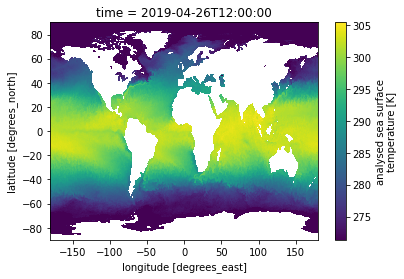

In [5]:
# select one variable and plot
# since data is 2D meshgrid, it plots colormesh by default
ds.analysed_sst.plot()

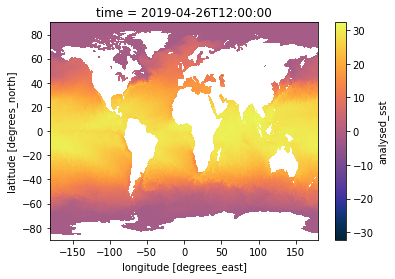

In [6]:
# changing values in a variable
# here, SST is converted from degree Kelvin to degree Celcius
(ds.analysed_sst-273.15).plot(cmap='cmo.thermal')

In [7]:
# change is not affected unless it is saved to the variable
ds_sst = ds.analysed_sst - 273.15

In [8]:
# uncomment line to save data in netCDF
#ds_sst.to_netcdf('data/SSTinCelcius.nc')

In [9]:
# printsdata underneath a variable, which is numpy array
ds_sst.data

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878]]], dtype=float32)

In [10]:
# shape of numpy array
ds_sst.data.shape

(1, 2048, 4096)

In [11]:
# coordinates can be accessed the same way as variables
ds_sst.time
# or ds_sst['time']

<xarray.DataArray 'time' (time: 1)>
array(['2019-04-26T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-26T12:00:00
Attributes:
    standard_name:  time
    axis:           T
    long_name:      nominal time of L4 analysis

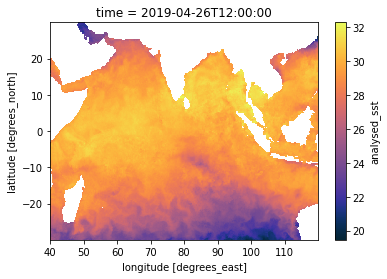

In [12]:
# selecting a region
ds_sst.sel(lon=slice(40,120),lat=slice(-30,30)).plot(cmap='cmo.thermal')

In [13]:
# read and combine many files along a dimension
ds_comb = xr.open_mfdataset('data/remss/*.nc',combine='by_coords')

In [14]:
# time coordinate now has 10 values instead of one
# data combined in time dimension
ds_comb

<xarray.Dataset>
Dimensions:           (lat: 2048, lon: 4096, time: 10)
Coordinates:
  * lat               (lat) float32 -89.956 -89.86811 ... 89.86811 89.956
  * lon               (lon) float32 -179.956 -179.8681 ... 179.8681 179.956
  * time              (time) datetime64[ns] 2019-04-26T12:00:00 ... 2019-05-0...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-16 22:06:41-0700 created by fuse_sens...
    comment:                    This research was supported by the NASA Physi...
    license:                    GHRSST protocol describes data use as free an...
    id:                         REMSS-L4-MW_IR
    naming_authority:           org.ghrsst
    product_version:            v05.0
    uuid:                       d83a1d25-0b2b-4e74-aef8-bcc6d1f12ee6
    gds_version_id:             2.0
    netcdf_version_id:          4.6.1
    date_created:               20190517T050641Z
    file_quality_level:         3
    spatial_resolution:         9 km
    start_time:                 20190426T000000Z
    time_coverage_start:        20190426T000000Z
    stop_time:                  20190426T235959Z
    time_coverage_end:          20190426T235959Z
    northernmost_latitude:      90.0
    southernmost_latitude:      -90.0
    easternmost_longitude:      180.0
    westernmost_longitude:      -180.0
    source:                     OBPG-L3C-MODIS_Aqua,OBPG-L3C-MODIS_Terra,REMS...
    platform:                   Aqua,Coriolis,GCOM-W1,GPM,Terra
    sensor:                     AMSR-2,GMI,MODIS,WindSat
    Metadata_Conventions:       Unidata Dataset Discovery 1.0
    metadata_link:              https://podaac.jpl.nasa.gov/ws/metadata/datas...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.08789057
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.087890595
    acknowledgment:             http://www.remss.com/measurements/sea-surface...
    creator_name:               Remote Sensing Systems
    creator_email:              support@remss.com
    creator_url:                http://www.remss.com
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

In [15]:
# shape of combined data
ds_comb.analysed_sst.shape

(10, 2048, 4096)

In [16]:
# time information was read in from each file and appended
ds_comb.time.data

array(['2019-04-26T12:00:00.000000000', '2019-04-27T12:00:00.000000000',
       '2019-04-28T12:00:00.000000000', '2019-04-29T12:00:00.000000000',
       '2019-04-30T12:00:00.000000000', '2019-05-01T12:00:00.000000000',
       '2019-05-02T12:00:00.000000000', '2019-05-03T12:00:00.000000000',
       '2019-05-04T12:00:00.000000000', '2019-05-05T12:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
# convert SST from degree Kelvin to degree Celcius
ds_sst_comb = ds_comb.analysed_sst - 273.15

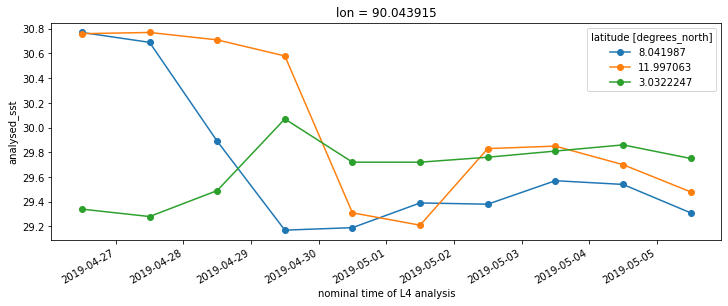

In [18]:
# select a few points and plot time series
ds_sst_comb.sel(lat=[8,12,3],lon=90,method='nearest').plot(hue='lat',figsize=(12,4),marker='o')

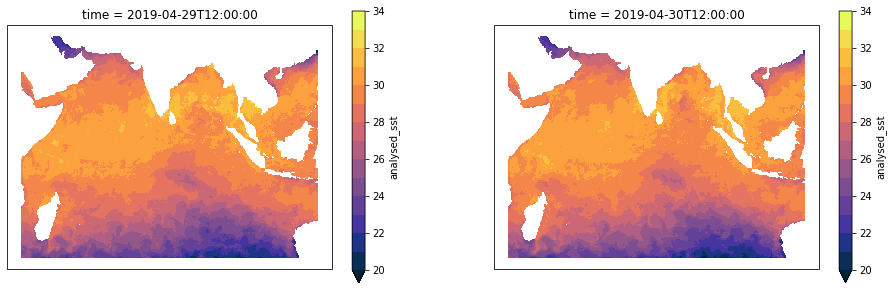

In [19]:
# plot SST for two days (2019-04-29 and 2019-04-30) side by side
fig,ax = plt.subplots(1,2,figsize=(16,5),subplot_kw={'projection':ccrs.PlateCarree()})
ds_sst_comb.isel(time=3).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[0],cmap='cmo.thermal',levels=np.arange(20,35,1))
ds_sst_comb.isel(time=4).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[1],cmap='cmo.thermal',levels=np.arange(20,35,1))

/home/lijo/miniconda3/envs/XR/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/home/lijo/miniconda3/envs/XR/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


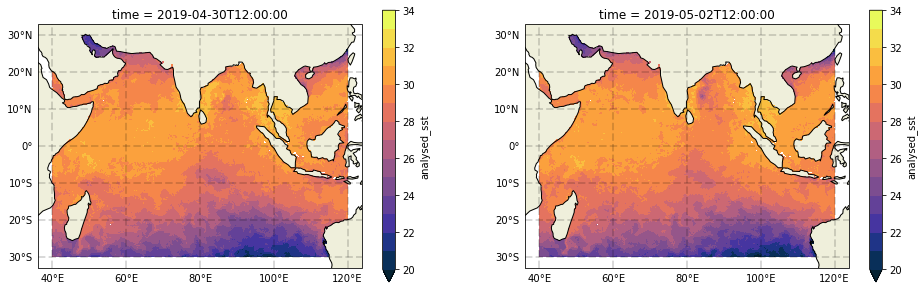

In [20]:
# add land feature, coastlines and format lat lon labels
import go_land # see the file go_land.py
fig,ax = plt.subplots(1,2,figsize=(16,5),subplot_kw={'projection':ccrs.PlateCarree()})
ds_sst_comb.isel(time=4).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[0],cmap='cmo.thermal',levels=np.arange(20,35,1))
ds_sst_comb.isel(time=6).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[1],cmap='cmo.thermal',levels=np.arange(20,35,1))
for p in ax:
    go_land.fig_beauty(ax=p)

/home/lijo/miniconda3/envs/XR/lib/python3.8/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)


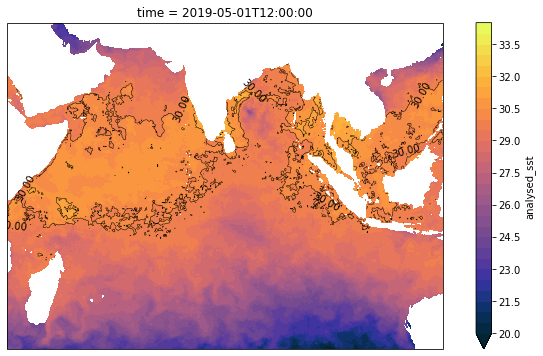

In [21]:
# add contours for temperatures above 30 degree Celcius
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection':ccrs.PlateCarree()})
cf = ds_sst_comb.isel(time=5).sel(lon=slice(40,120),lat=slice(-30,30)).plot.contourf(ax=ax,cmap='cmo.thermal',levels=np.arange(20,35,0.5))
c = ax.contour(cf,levels=np.arange(30,35,1),colors='black',linewidths=0.5)
ax.clabel(c,inline=True,fmt='%3.2f')

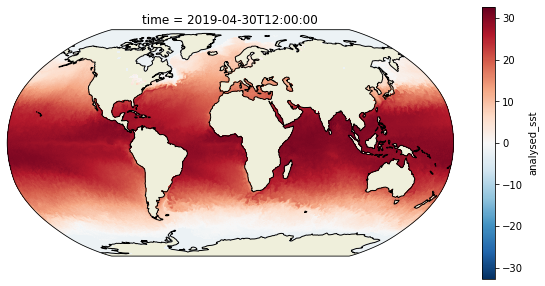

In [22]:
# change in plot projection
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.Robinson()},figsize=(10,5))
ds_sst_comb.sel(time='2019-04-30').plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)

## Further resources
* Documentation [page](http://xarray.pydata.org/en/stable/index.html) for Xarray well explains use cases and has a lots of [examples](http://xarray.pydata.org/en/stable/examples.html) 
* [Workshop](https://nbviewer.jupyter.org/github/fmaussion/teaching/blob/master/xarray_intro_acinn/ACINN_workshop_xarray-slides.ipynb) by [Fabien Maussion](https://github.com/fmaussion) on Xarray usage 